In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import os
from utils import ELEMENTS_NAMES, ELEMENTS_UNITS

figures_dir = "../figures/norm"
data_dir = "../data/train"

os.makedirs(figures_dir, exist_ok=True)

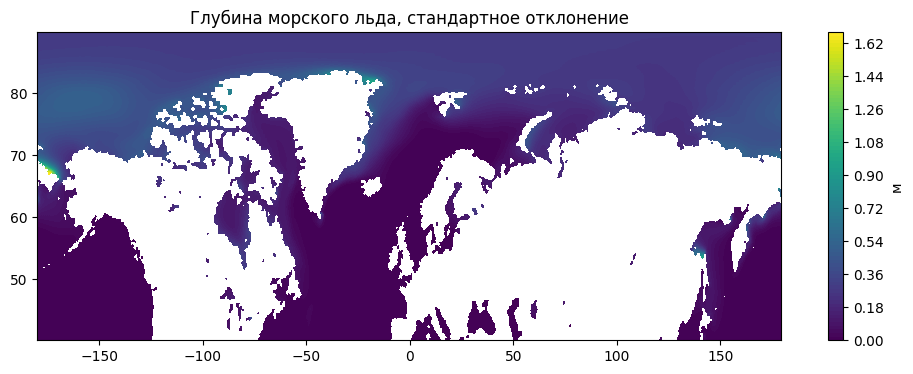

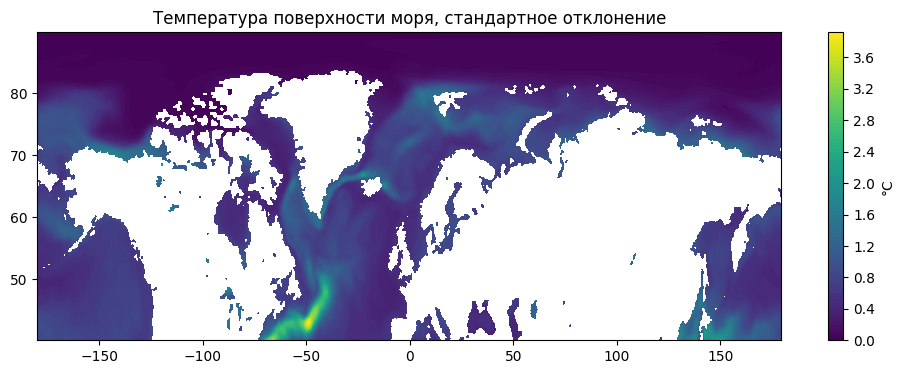

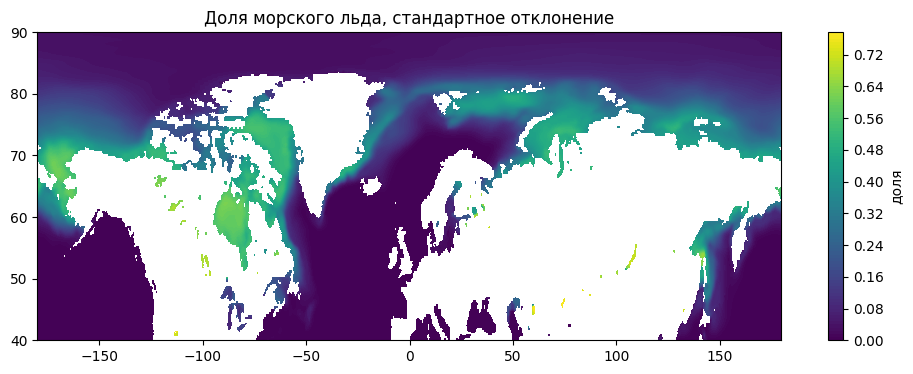

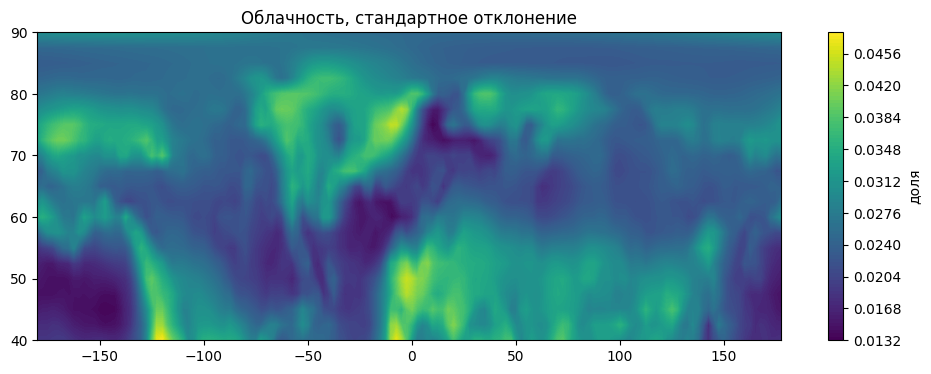

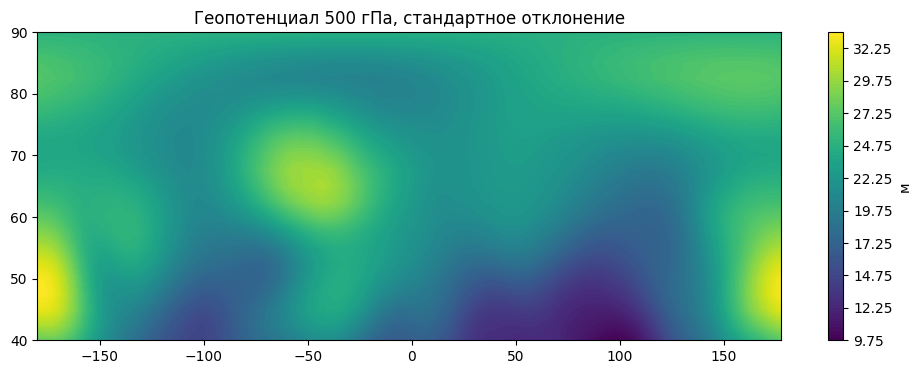

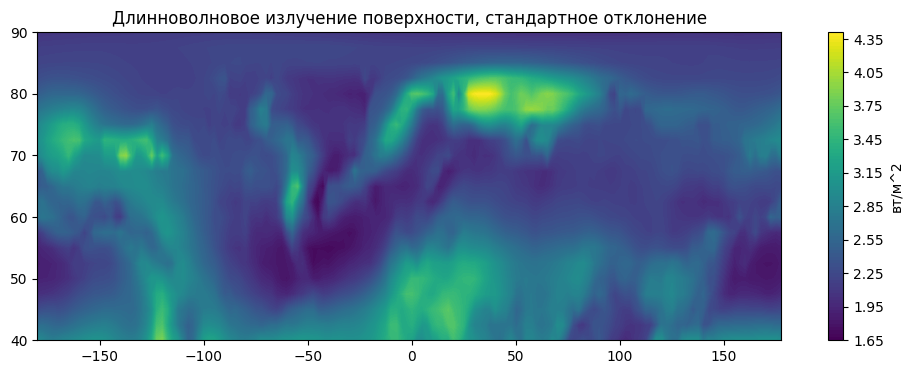

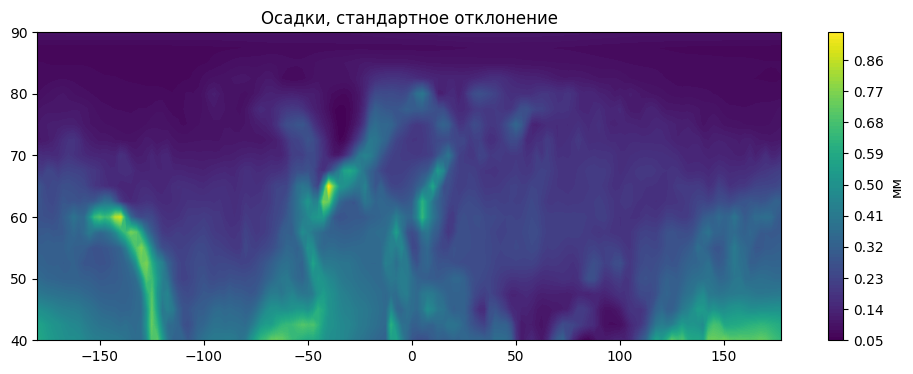

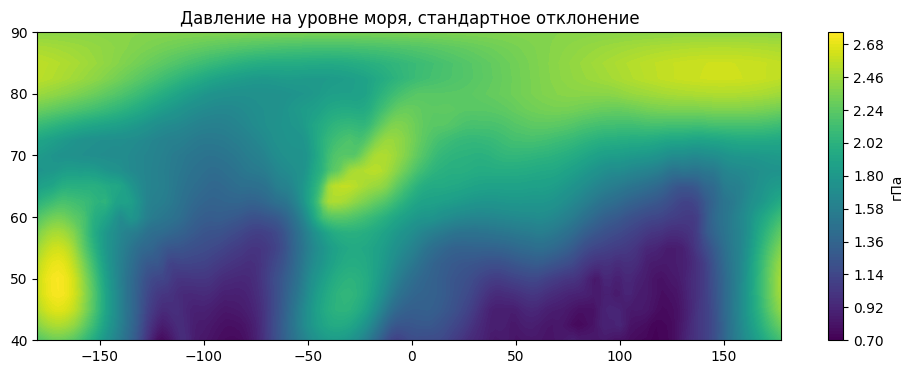

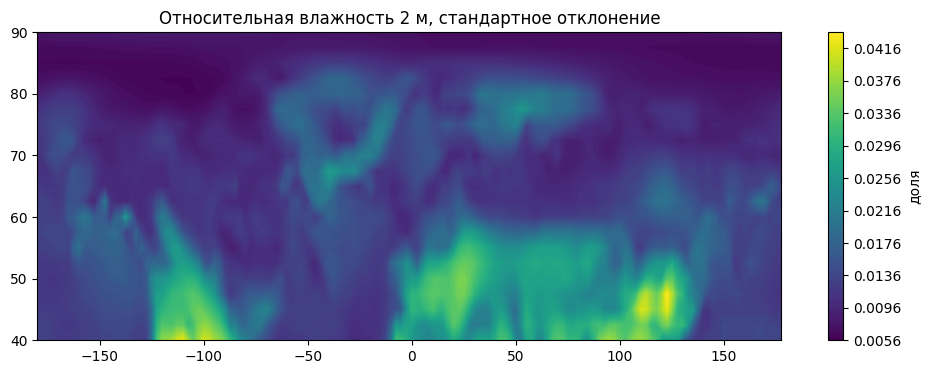

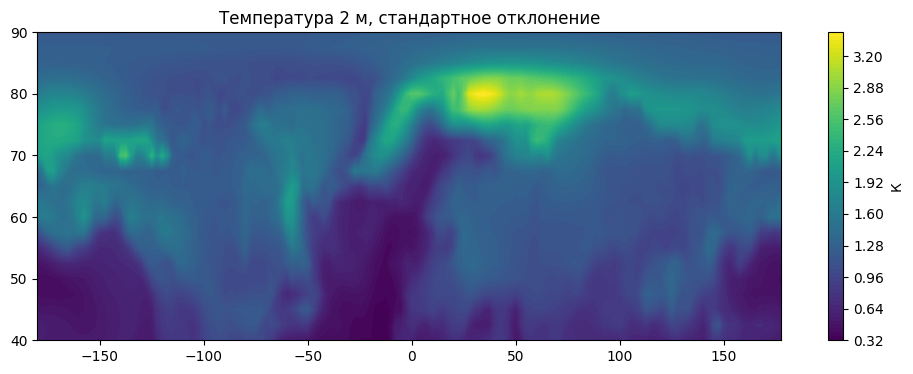

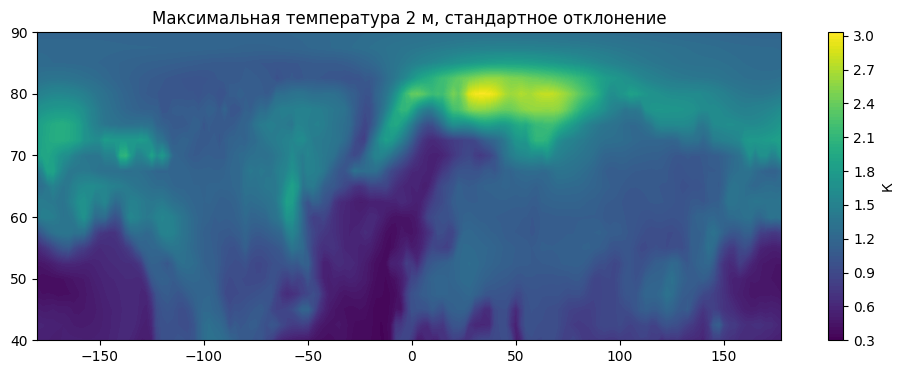

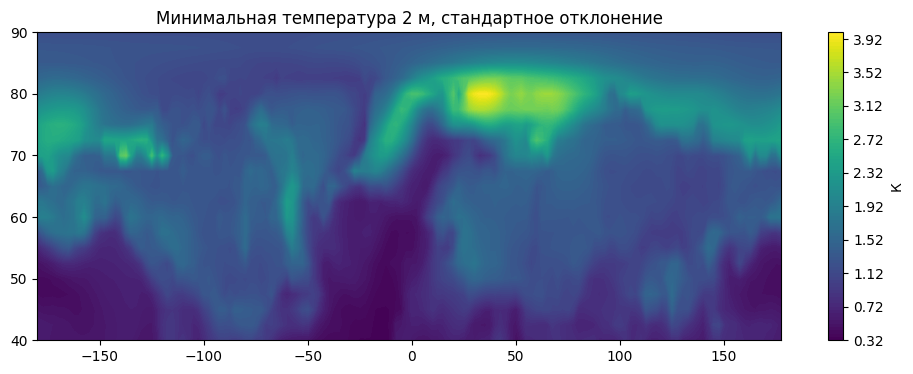

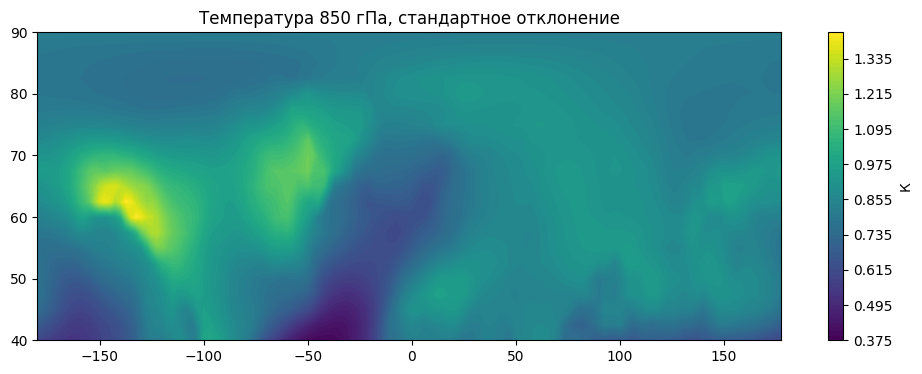

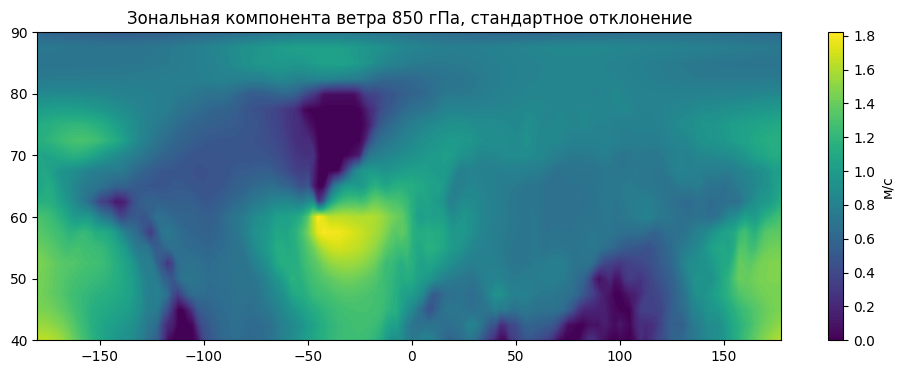

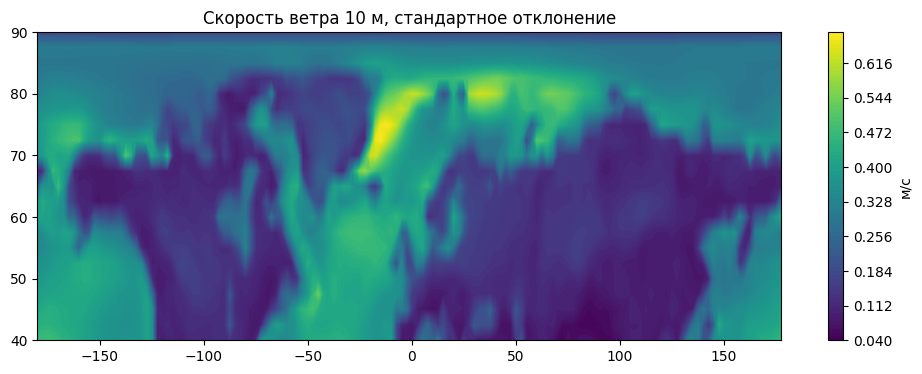

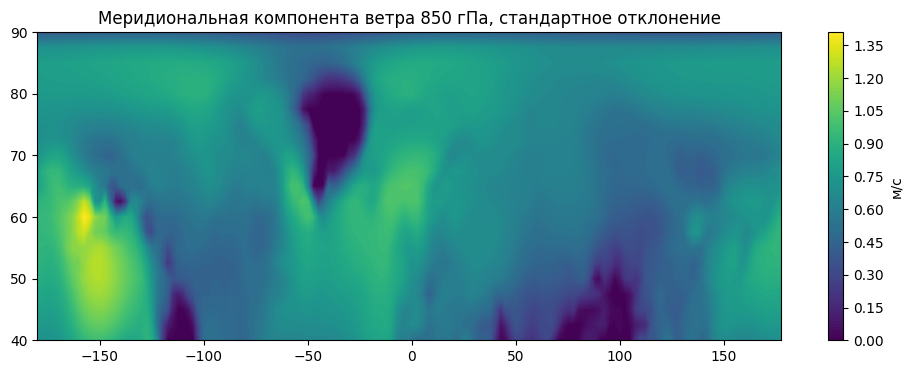

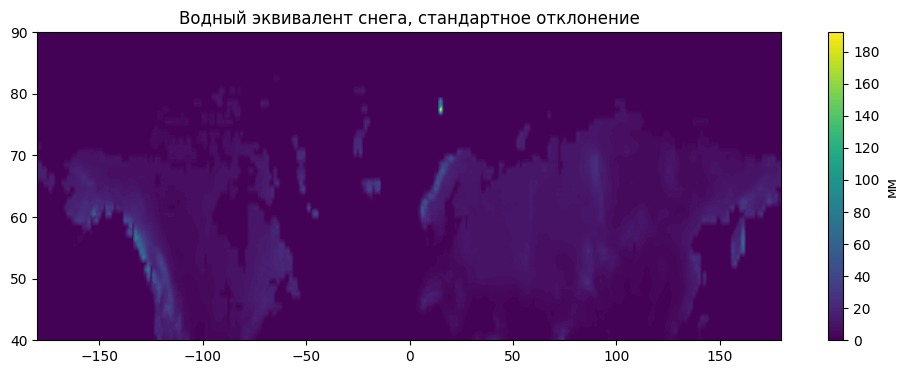

In [2]:
def plot_figure(ds, v, title=None):
    dims = ds[v].dims
    lat, lon = ds[dims[0]].values, ds[dims[1]].values
    lon, lat = np.meshgrid(lon, lat)
    plt.figure(figsize=(12, 4))
    plt.contourf(lon, lat, ds[v].values, 101)
    plt.title(f'{ELEMENTS_NAMES[v]}, стандартное отклонение')
    cb = plt.colorbar()
    cb.set_label(ELEMENTS_UNITS[v])
    plt.savefig(f'{figures_dir}/{v}_std.png', dpi=150, bbox_inches='tight')
    plt.show()

ds = xr.open_dataset(f"{data_dir}/aice/std.nc", engine='h5netcdf')
for v in ds.data_vars:
    plot_figure(ds, v)
ds.close()

ds = xr.open_dataset(f"{data_dir}/swe/std.nc", engine='h5netcdf')
plot_figure(ds, 'swe')
ds.close()